<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

In [2]:
!wget --header="Host: doc-0o-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_nso6dcn1mbidkt5qr539a2jiefc09pqv_nonce=iak2ig7rpq664" --header="Connection: keep-alive" "https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr" -c -O 'storage_sample_stage4.h5'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
os.chdir(r'C:\Users\Bazinga\AAIC\Assignments\FB Friend Recommendation system')

In [4]:
os.getcwd()

'C:\\Users\\Bazinga\\AAIC\\Assignments\\FB Friend Recommendation system'

In [5]:
#reading
from pandas import read_hdf
df_final_train = read_hdf(r'data\fea_sample\storage_sample_stage6.h5', 'train_df',mode='r')
df_final_test = read_hdf(r'data\fea_sample\storage_sample_stage6.h5', 'test_df',mode='r')

In [6]:
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 58)
(50002, 58)


In [7]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'svd_dot_u', 'svd_dot_v', 'followers_preferential_attachment',
       'followees_preferential_attachment'],
      dtype='obj

In [8]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [9]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [10]:
'''size=10000
df_final_train=df_final_train.head(size)
df_final_test=df_final_test.head(size)
y_train=y_train.head(size)
y_test=y_test.head(size)'''

'size=10000\ndf_final_train=df_final_train.head(size)\ndf_final_test=df_final_test.head(size)\ny_train=y_train.head(size)\ny_test=y_test.head(size)'

## 1. Random Forest Classifier

Estimators =  10 Train Score 0.9226728612087729 test Score 0.9103998980610359
Estimators =  50 Train Score 0.9218118147329804 test Score 0.9063572063868536
Estimators =  100 Train Score 0.921450751199724 test Score 0.9169962137147665
Estimators =  250 Train Score 0.9211178370918671 test Score 0.9169261846645904
Estimators =  450 Train Score 0.9214820703795138 test Score 0.9173597220760081


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

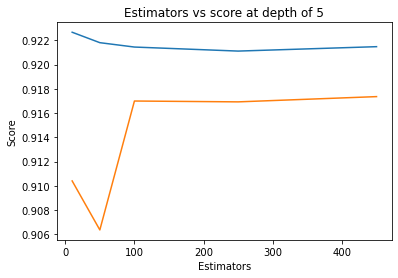

In [11]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.909291670106497 test Score 0.8760825403613816
depth =  9 Train Score 0.954456660700588 test Score 0.9233231546804255
depth =  11 Train Score 0.9610447639938257 test Score 0.9243665700239506
depth =  15 Train Score 0.9632299195971736 test Score 0.9246387146842293
depth =  20 Train Score 0.9641287021149141 test Score 0.9249134585125354
depth =  35 Train Score 0.9640416349327241 test Score 0.9246905810782462
depth =  50 Train Score 0.9640416349327241 test Score 0.9246905810782462
depth =  70 Train Score 0.9640416349327241 test Score 0.9246905810782462
depth =  130 Train Score 0.9640416349327241 test Score 0.9246905810782462


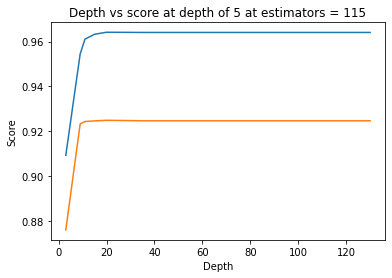

In [12]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [13]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist, return_train_score=True,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores', rf_random.cv_results_['mean_train_score'])

mean test scores [0.96172967 0.96177292 0.96059671 0.96150911 0.96271213]
mean train scores [0.96271318 0.96265948 0.96108732 0.96241182 0.9639181 ]


In [14]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [16]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [17]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [18]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9641338003147047
Test f1 score 0.9251903273840733


In [19]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


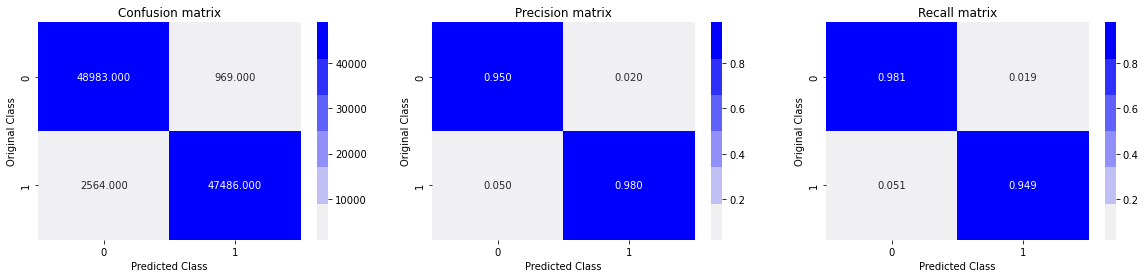

Test confusion_matrix


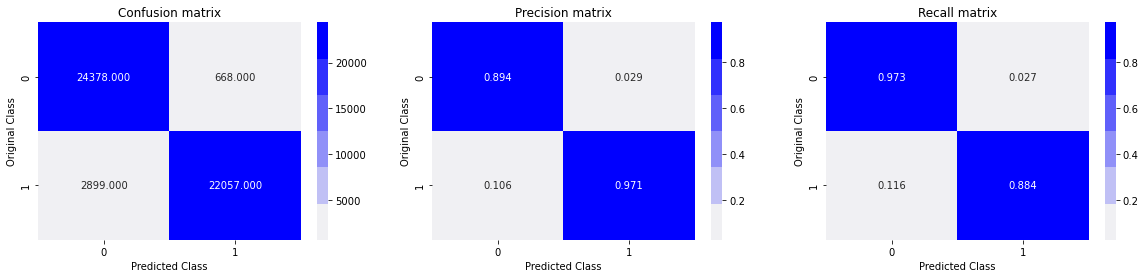

In [20]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

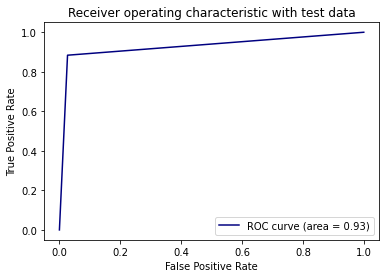

In [21]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

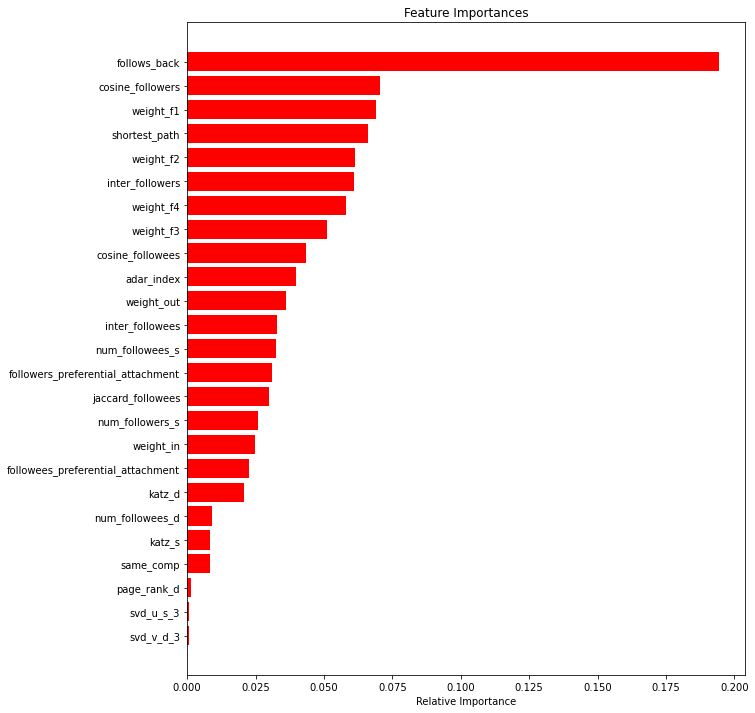

In [22]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 2. XGBoost Classifier

In [23]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

params = {}
params['learning_rate'] = [0.01, 0.05, 0.1, 0.3, 0.5]
params['max_depth'] = [4, 5, 6, 7]
params['n_estimators'] = [100, 150, 200]

model = xgb.XGBClassifier(nthread=-1)

#cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

search = RandomizedSearchCV(model, params, n_iter=100, scoring='f1', n_jobs=-1, verbose=2, cv=2, return_train_score=True, random_state=1)
result=search.fit(df_final_train, y_train)
#search.predict_proba(df_final_train, y_train)
# execute search

print('mean test scores',result.cv_results_['mean_test_score'])
print('mean train scores',result.cv_results_['mean_train_score'])

Fitting 2 folds for each of 60 candidates, totalling 120 fits
[16:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
mean test scores [0.92381801 0.92518663 0.93234229 0.9293716  0.94207308 0.95708753
 0.96265823 0.96594564 0.9671043  0.96610886 0.96994645 0.97114659
 0.96823339 0.97283347 0.97421271 0.97160479 0.97362179 0.9751855
 0.97293618 0.97482658 0.97647411 0.97401589 0.9757453  0.97725371
 0.97431373 0.97621915 0.97742238 0.9756511  0.97720192 0.97860791
 0.97636288 0.97850196 0.97990645 0.97728999 0.97883374 0.98030957
 0.97924786 0.98114028 0.98195241 0.98020441 0.98144525 0.98205199
 0.98047434 0.98166061 0.98197662 0.98111958 0.98153707 0.98173068
 0.98120414 0.98190687 0.98241538 0.98133335 0.98170161 0.98211552
 0.981113

In [24]:
print(result.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [55]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=90, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

[16:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [57]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9756853372760691
Test f1 score 0.9307190649614635


Train confusion_matrix


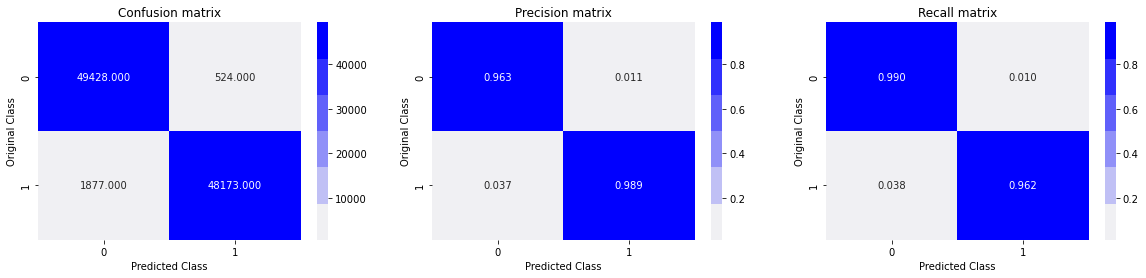

Test confusion_matrix


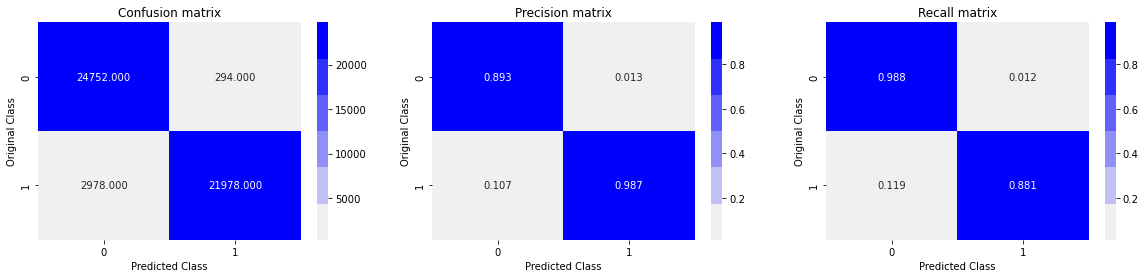

In [58]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

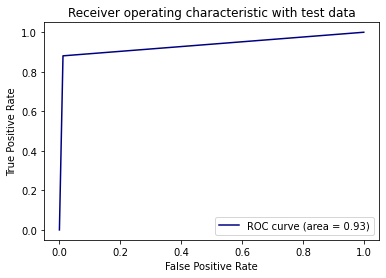

In [59]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

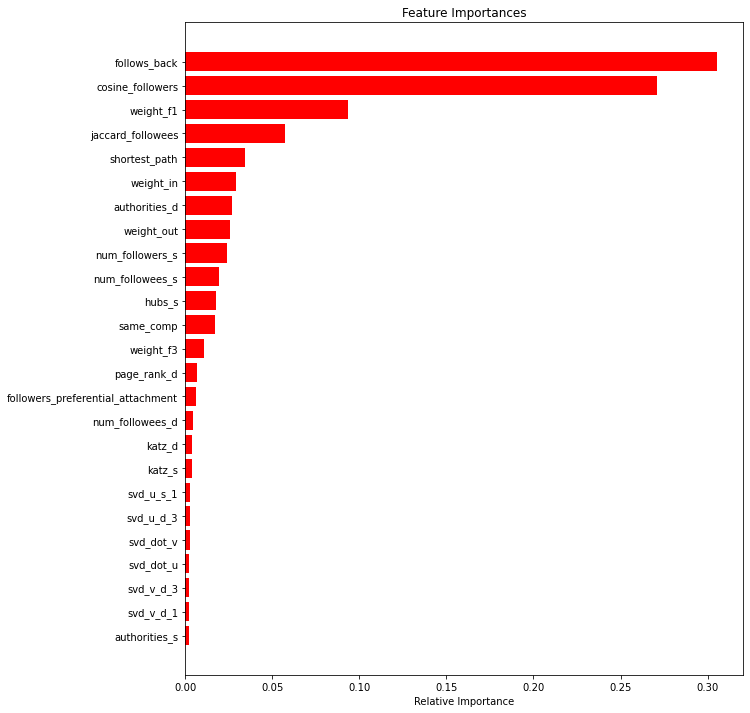

In [60]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Conclusions

<p>- For XGBoost model, tt is found that the best hyperparameters suggested by Random search cv tend to over fit the training data, though it gives higher f1 score.
<br>- So, changed the hyperparameter slighly, so that we can compromise with train f1 accuracy but make sure that our model does not overfit
<br>- Random forest gave bit less f1 scored compared to XGBoost 
<br>- It is very easy to overfit XGBoost model, don't rely always on Best hyperparameters given by GridsearchCV or Ramdomizedserch cv as best parameters tend to overfit easily
<br> We an see that 'Followers preferrential attachment' turned out to be a important feature
</p>

In [62]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Train F1 score", "Test F1 score"]
x.add_row(["Random Forest", '0.9641', '0.9252'])
x.add_row(["XGBoost", '0.9757', '0.9307'])

print(x)

+---------------+----------------+---------------+
|     Model     | Train F1 score | Test F1 score |
+---------------+----------------+---------------+
| Random Forest |     0.9641     |     0.9252    |
|    XGBoost    |     0.9757     |     0.9307    |
+---------------+----------------+---------------+
